In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [9]:
df = pd.read_csv("C:/Users/문도/Desktop/인지개 자료/car_evaluation.csv")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [10]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [12]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [13]:
df = df.dropna()
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

Text(0.5, 1.0, 'Label')

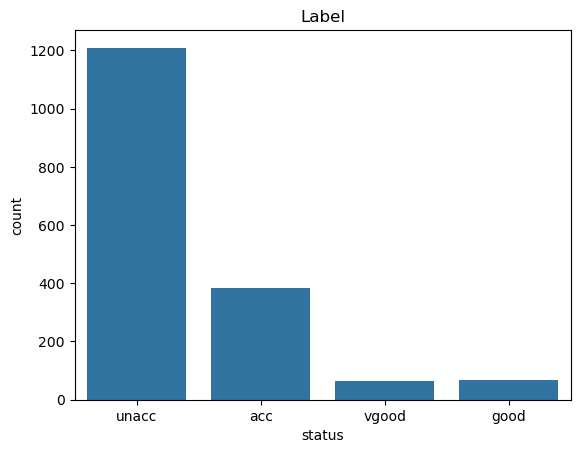

In [14]:
sns.countplot(data = df, x="unacc")
plt.xlabel("status")
plt.ylabel("count")
plt.title("Label")

In [26]:
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

print(df.head())

   vhigh  vhigh.1  2  2.1  small  low  unacc
0      3        3  0    0      2    2      2
1      3        3  0    0      2    0      2
2      3        3  0    0      1    1      2
3      3        3  0    0      1    2      2
4      3        3  0    0      1    0      2


Text(0.5, 1.0, 'Label')

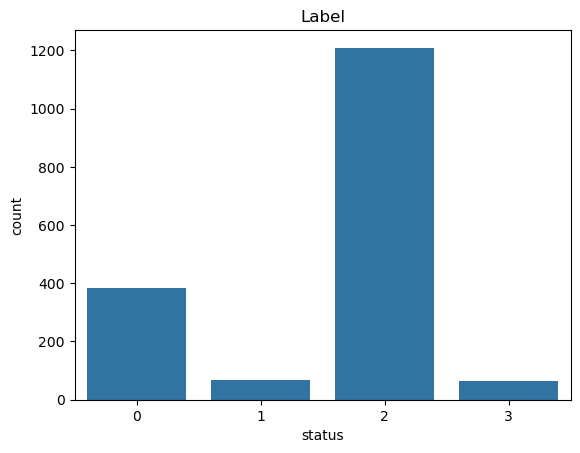

In [29]:
sns.countplot(data = df, x="unacc")
plt.xlabel("status")
plt.ylabel("count")
plt.title("Label")

In [30]:
df['unacc'].value_counts()

unacc
2    1209
0     384
1      69
3      65
Name: count, dtype: int64

In [37]:
X=df.drop('unacc',axis=1)
X

,vhigh,vhigh.1,2,2.1,small,low
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [32]:
y=df['unacc']
y.value_counts()

unacc
2    1209
0     384
1      69
3      65
Name: count, dtype: int64

In [33]:
Y = pd.get_dummies(y).values
Y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [34]:
X = X.values
X

array([[3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1381, 6), (1381, 4), (346, 6), (346, 4))

In [45]:
model = Sequential()

model.add(Dense(10, input_shape = (6,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240 (960.00 B)

 Trainable params: 240 (960.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3793 - loss: 1.4047 - val_accuracy: 0.6936 - val_loss: 1.2196
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6974 - loss: 1.1977 - val_accuracy: 0.6908 - val_loss: 1.1031
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7003 - loss: 1.0700 - val_accuracy: 0.6908 - val_loss: 1.0290
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7002 - loss: 0.9860 - val_accuracy: 0.6908 - val_loss: 0.9752
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7167 - loss: 0.9065 - val_accuracy: 0.6936 - val_loss: 0.9243
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7174 - loss: 0.8501 - val_accuracy: 0.6936 - val_loss: 0.8751
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7171 - loss: 0.8092 - val_accuracy: 0.6965 - val_loss: 0.8315
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7082 - loss: 0.7770 - val_accuracy: 0.6965 - val_loss:

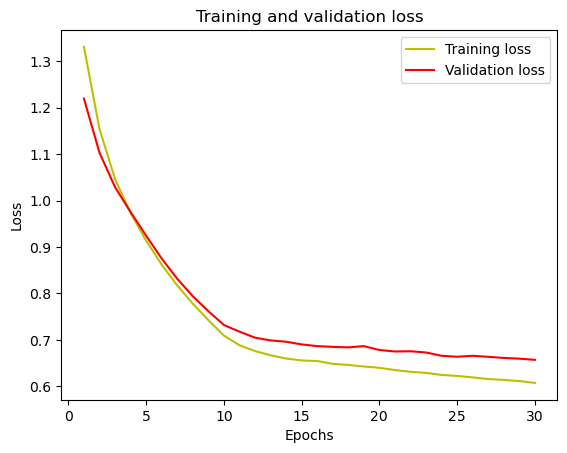

In [48]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

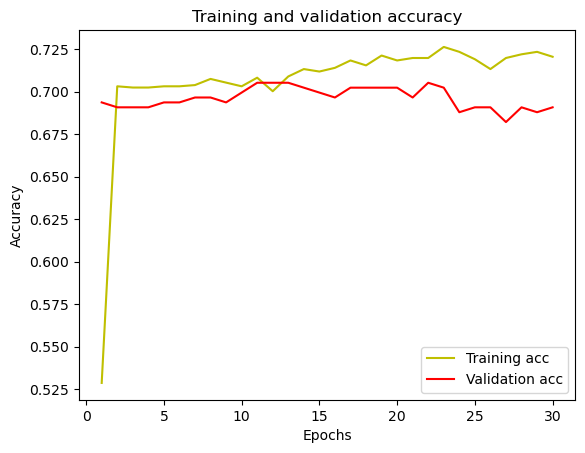

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print("accuracy : \n", classification_report(y_test_class,y_pred_class))
print("confusion_matrix : \n", confusion_matrix(y_test_class,y_pred_class))

accuracy : 
               precision    recall  f1-score   support

           0       0.38      0.23      0.29        77
           1       0.00      0.00      0.00        14
           2       0.74      0.92      0.82       239
           3       0.00      0.00      0.00        16

    accuracy                           0.69       346
   macro avg       0.28      0.29      0.28       346
weighted avg       0.60      0.69      0.63       346

confusion_matrix : 
 [[ 18   0  59   0]
 [  4   0  10   0]
 [ 18   0 221   0]
 [  7   0   9   0]]


F:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
